# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования - найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


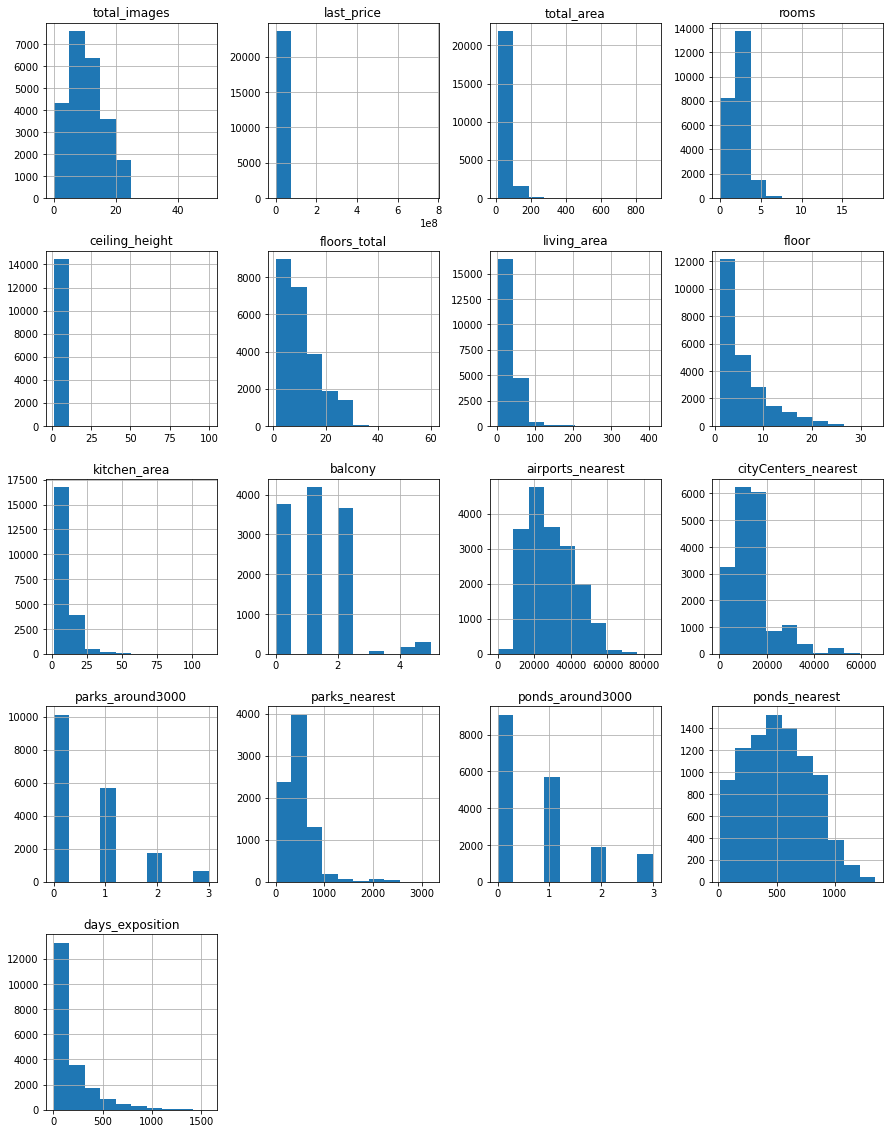

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data)
data.hist(figsize=(15, 20));

Вывод: есть пропущенные значения, по гистограммам видно, что есть аномальные значение ближе к 0 (в данных по этажам, площади,днях показа объявлений,ценой)

### Предобработка данных
ЭТАП №1. Найти и изучить пропущенные значения в столбцах. Оценим объем пропусков:

In [2]:
data.info()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски встречаются в 14 столбцах. Все данные могут влиять на стоимость и на число дней экспозиции объявления. Для каждого столбца будет свой порядок замены.

1.Заменить Nan на unknown в:

locality_name

2.Замена Nan медианным значением в столбцах:

ceiling_height
floors_total
kitchen_area
living_area

3.Замена на 0 в следующих столбцах, так как если не указали балкон, то скорее всего его нет:

balcony 

4.Замена на 'unknown' в столбце апартаменты это или нет, так как больше 20 000 объявлений пропустили этот пункт

is_apartment         

5.Привести даты к значениям читаемых дат first_day_exposition, отсчитать сколько дней прошло до сегодняшнего момента (вписать вместо в nan получившиеся значения), посчитать медианное и оценить, что с ними делать:

days_exposition

2.1.1 Замена неизвестных названий населенного пункта на 'unknown' 

In [3]:
data['locality_name'] = data['locality_name'].fillna('unknown')
#print(data.loc[data['locality_name'] == 'unknown'])

#проверка
print(data['locality_name'].isna().sum())
print(data['locality_name'].unique())

0
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый С

2.1.2 Замена медианными значениямивысоты потолков, жилой площади, площади кухни и количество этажей

In [4]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

#проверка

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Количество этажей в floors_total заменим на медианное по населенному пункту так как в Кудрово например - многоэтажные дома, а в Рождественно-в основном 1-2-3 этажные

In [5]:
for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['floors_total'].isna()), 'floors_total'] = data.loc[(data['locality_name'] == d), 'floors_total'].median()
#проверка

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


2.1.3 Замена Nan на 0 по балконам, где их не указали, так как если не указали-их скорее всего нет

In [6]:
data['balcony'] = data['balcony'] .fillna(0)

#проверка

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


2.1.4 Замена неизвестных данных апартаменты это или нет на 'unknown', пропущенных свыше 20 000 значений, скорее всего этот пункт просто пропускали при заполнении данных, но он не важен при анализе, так как квартира это или нет может быть понятно из числа этажей

In [7]:
data['is_apartment'] = data['is_apartment'] .fillna('False')

#проверка

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


2.1.5 Пропуски в числе дней публикации можно заменить на медианные значения, но так как известны все даты первой публикации можно рассчитать по формуле сегодняшний день - дата первой публикации.
Но, я не знаю какой давности таблица, поэтому если возьму сегодняшний день, получатся слишком большой период. Предполагаю, что аналитики выгрузили свежие данные, поэтому вычислю дату последней публикации "most_recent_date" объявления и вычту из нее дату первой публикации "first_day_exposition". Этим значением заполню пропуски в столбце 'days_exposition'

In [8]:
#уберем из даты минуты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#вычислим дату последней публикации
most_recent_date = pd.to_datetime(data['first_day_exposition'].max())
data['days_exposition'] = data['days_exposition'].fillna((most_recent_date - data['first_day_exposition']).dt.round('D').dt.days)

#проверка
print(data['days_exposition'])
print(data['days_exposition'].isna().sum())

0         57.0
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694    773.0
23695     45.0
23696    446.0
23697    602.0
23698    651.0
Name: days_exposition, Length: 23699, dtype: float64
0


ЭТАП №2 Анализ типа данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Встречаются все типы данных bool(2), datetime64(1), float64(13), int64(3), object(3). Чтобы корректно считать значения по столбцам необходимо поменять тип данных

1.Данные вроде этажей не могут быть типом float, так как это фактическое число, поэтому следующие столбцы переведем в int:

floors_total
balcony 
parks_around3000
ponds_around3000
days_exposition

2.Булевы значения переведем в 0 и 1 (int), так будет легче считать по столбцам:
studio  
open_plan 

3.Округление значений в столбцах parks_nearest и ponds_nearest, так как там указаны данные с 6 нулями после точки 

2.2.1 Перевод типа данных из float в int в 4 столбцах

In [10]:
import numpy as np
data['floors_total'] = np.floor(pd.to_numeric(data['floors_total'], errors='coerce')).astype('int')
#print(data['floors_total'])

data['balcony'] = np.floor(pd.to_numeric(data['balcony'], errors='coerce')).astype('int')
#print(data['balcony'])

data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('int')
print(data['days_exposition'])

#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0         57
1         81
2        558
3        424
4        121
        ... 
23694    773
23695     45
23696    446
23697    602
23698    651
Name: days_exposition, Length: 23699, dtype: int64


0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

2.2.2 Перевод булевых значений

In [11]:
#сначала посчитаем перед применением функции сколько False и True в столбце до
data['studio'].value_counts(sort=True).to_dict()
#получилось False 23550, True 149

#заменим false на 0, True на 1
data['studio'].replace({False: 0, True: 1}, inplace=True)

#переведем в тип данных int
data['studio'] = data['studio'].astype(int)

#проверка
#print(data['studio'].sum())

#сделаем то же самое со столбцом 'open_plan'
data['open_plan'].value_counts(sort=True).to_dict()
#получилось False 23632, True 67

data['open_plan'].replace({False: 0, True: 1}, inplace=True)
data['open_plan'] = data['open_plan'].astype(int)

#проверка
print(data['open_plan'])

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: open_plan, Length: 23699, dtype: int64


2.2.3 Округлим в 2х столбцах числа 482.000000 до 1 цифры после точки, как в столбцах по паркам и водоемам по близости. Расстояния до парков и водоемов оставим в метрах.

In [12]:
#parks_nearest
#ponds_nearest

data['parks_nearest'] = np.around(data['parks_nearest'], decimals=0)
data['ponds_nearest'] = np.around(data['ponds_nearest'], decimals=0)

#проверка
print(data['parks_nearest'].head())
print(data['ponds_nearest'].head())

0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
Name: parks_nearest, dtype: float64
0    755.0
1      NaN
2    574.0
3    234.0
4     48.0
Name: ponds_nearest, dtype: float64


Проверка как обработаны все данные:

In [13]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  int64         
 11  open_plan             23699 non-null  int64         
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

ЭТАП №3 
Есть задвоенность названий, где-то Мурино указано просто как "Мурино", где-то как "поселок Мурино". Слово поселок писалось чере "Е" и "Ё". Чтобы система не посчитала это как разные значения - уберем дубли.

Сделаем обработку значений в 2 шага:
Ё заменим на Е, заменим названия вроде "поселок городского типра", "городской поселок" на просто "поселок"

In [14]:
#посмотрим уникальные значения
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

2.3.1 Уберем неявные дубликаты

In [15]:
#заменим везде ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#у крупных населенных пунктов, где много новостроек и большая населенность уберем слова "деревня" и "поселок", чтобы потом скомпоновать их в группы
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].str.replace('деревня Новое Девяткино','Новое Девяткино')

data['locality_name'] = data['locality_name'].str.replace('поселок Парголово','Парголово')
data['locality_name'] = data['locality_name'].str.replace('поселок Шушары','Шушары')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')    
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок') 
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок') 
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок') 
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')

data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','сад') 
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','сад') 

#проверка
with pd.option_context('display.max_rows',999):
    print(data['locality_name'].value_counts())

Санкт-Петербург                    15721
Мурино                               590
Кудрово                              472
Шушары                               440
Всеволожск                           398
Пушкин                               369
Колпино                              338
Парголово                            327
Гатчина                              307
Выборг                               237
Петергоф                             201
Сестрорецк                           183
Красное Село                         178
Новое Девяткино                      144
Сертолово                            142
Ломоносов                            133
Кириши                               125
поселок Бугры                        114
Сланцы                               112
Волхов                               111
Тосно                                104
Кингисепп                            104
Кронштадт                             96
Никольское                            93
Коммунар        

ЭТАП №4 Поиск аномалий
Попробуем найти по стобцам редкие и выбивающиеся значения. Посмотрим в целом на таблицу

In [16]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.670028,34.457852,5.892358,0.006287,0.002827,10.428526,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,185.821722
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.587831,22.030445,4.885249,0.079044,0.053097,5.631126,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,233.380877
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,0.000000,0.000000,7.400000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,43.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,0.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,94.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,0.000000,0.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,237.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,1.000000,1.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1618.000000


2.4 Найденные аномалии по столбцам:
1. total_area (max знач 900, проверить сколько это всего значений)
2. ceiling_height (max высота потолков 100м)
3. floors_total (max этаж 60, оценить много их или нет, может быть это 1 значение из Лахта-центр)
4. airports_nearest, cityCenters_nearest,parks_nearest,ponds_nearest странные расстояния больше чем в несколько 1000 км
5. last_price
6. rooms (max количество комнат - 19, возможно эта недвижимость в коммунальной квартире)
    
разберем каждый по порядку: 

2.4.1 Рассмотрим значения в столбце общей площади. В нем было значение в 900м.кв.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

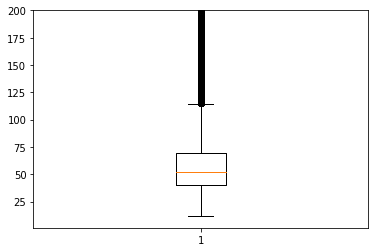

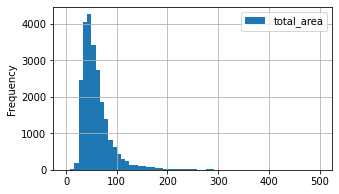

In [17]:
#посмотрим распределение значений
import matplotlib.pyplot as plt
plt.boxplot(data['total_area'])
plt.ylim(1,200)

#составим гистограмму
data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (5,3), range = (0,500))

#посмотрим значения по столбцу
data['total_area'].describe()

Общая площадь в данных от 12 до 900 м2, среднее значение 60, а медиана 35 м2. Распределение данных Гаусса. 
Есть объекты выше 200-300 метров, их немного. По диаграмме размаха, видно что квартили на 10 и 120 м.кв. Отсечем значения по квартилям от 12 до 120 и оценим их объем.

<AxesSubplot:ylabel='Frequency'>

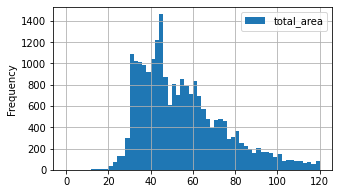

In [18]:
#отсечем выбивающиеся значения
good_data = data.query('12 <= total_area <= 120')

#проверим объем
good_data['total_area'].shape[0]/ data['total_area'].shape[0]

#посторим гистограмму по новым данным
good_data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (5,3), range = (0,120))

Удалено почти 5% данных. 

2.4.2 Переходим к высоте потолков "ceiling_height". В сталинках и элитном жилье высота потолка максимум 3.3 метра. В частных домах в Лен.области высота потолков в старых частных домах может быть около 2.0 м. Посчитаем сколько таких аномальных значений > 3.5 метров и <1.8.

In [19]:
#print(data.query('ceiling_height == 100'))
print(data.query('ceiling_height > 3.5').count())
print(data.query('ceiling_height < 2.0').count())

total_images            304
last_price              304
total_area              304
first_day_exposition    304
rooms                   304
ceiling_height          304
floors_total            304
living_area             287
floor                   304
is_apartment            304
studio                  304
open_plan               304
kitchen_area            304
balcony                 304
locality_name           304
airports_nearest        279
cityCenters_nearest     282
parks_around3000        282
parks_nearest           207
ponds_around3000        282
ponds_nearest           204
days_exposition         304
dtype: int64
total_images            3
last_price              3
total_area              3
first_day_exposition    3
rooms                   3
ceiling_height          3
floors_total            3
living_area             3
floor                   3
is_apartment            3
studio                  3
open_plan               3
kitchen_area            3
balcony                 3
localit

В итоге жилья с потолками свыше 3.5 м 304 шт, а домов с потолками меньше 2.0м 3 шт. (в целом это 1,2% данных). Заменим все потолки выше 3.5 метров средним (mean = 2.7), а потолки ниже 1,8 на 2 метра, чтобы не удалять строки.

In [20]:
def change_height(row):
    if row > 3.5:
        return 2.7
    elif row < 2.0:
        return 2.0 
    else: 
        return row
        
data['ceiling_height'] = data['ceiling_height'].apply(change_height)
data['ceiling_height'].describe()

count    23699.000000
mean         2.683201
std          0.175420
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

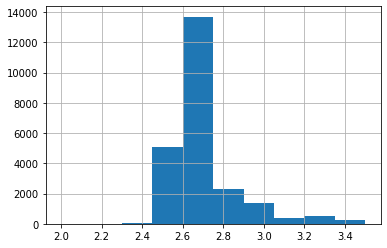

In [21]:
data['ceiling_height'].hist(bins=10)

2.4.3 Оценим аномалии в floors_total, жилых зданий в 60 этажей в СПб и ЛО 0 шт, не жилых выше 35 этажей тоже можно по пальцам пересчитать, максимум 36 этажей в доме на Обуховской обороны, и в объявлении так же указан максимальный этаж недвижимости 33. Оценим сумму и объем аномалий:

<AxesSubplot:ylabel='Frequency'>

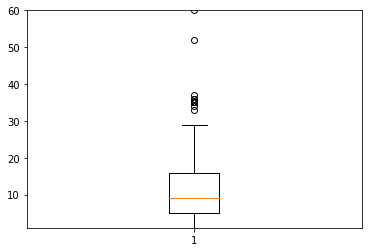

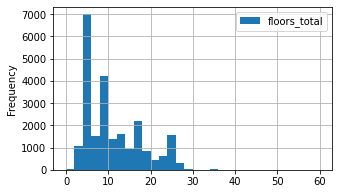

In [22]:
#print(data.query('floors_total > 35').count())
#print(data.query('floors_total == 60'))

plt.boxplot(data['floors_total'])
plt.ylim(1,60)

#составим гистограмму
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,60))

В целом на гистограмме видно, что самыми популярными домами в СПб и ЛО являются 5-этажные, 9-этажные дома. Медианное значение на 9 этажах.По диаграмме размаха квартиль лежит до 30 этажей. Отсортируем данные до 29 этажа и запишев в good_data

<AxesSubplot:ylabel='Frequency'>

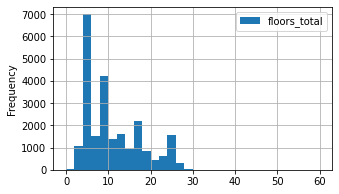

In [23]:
#отсечем выбивающиеся значения
good_data = data.query('floors_total <= 29')

#проверим объем
good_data['floors_total'].shape[0]/ data['floors_total'].shape[0]

#гистограмма по новым данным
good_data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,60))

Менее 1% убрано из данных. Есть большие значения данных по этажам, но я списываю на то, что в городе типовые застройки (в 5, 9, 16 этажей - это как раз пики на гистограмме, все что выше-уже новостройки, там есть разброс в числе этажей, но в целом широкой палитры этажности в городе - нет, поэтому оставляю столбец с этими пиками на 5-9 и 16 этажах так, как есть).

2.4.4 Переходим к анализу airports_nearest, cityCenters_nearest,parks_nearest,ponds_nearest, странные расстояния больше чем в несколько 1000 км. Выведем на экран в каких населенных пунктах какое расстояние до аэропорта указано:

               airports_nearest
locality_name                  
unknown            24572.341463
Зеленогорск        73300.250000
Колпино            26375.863501
Красное Село       26595.579545
Кронштадт          67469.263158
Ломоносов          48308.280303
Мурино             51553.000000
Павловск           21053.342105
Парголово          53994.926606
Петергоф           40184.676617
total_images            1532
last_price              1532
total_area              1532
first_day_exposition    1532
rooms                   1532
ceiling_height          1532
floors_total            1532
living_area             1431
floor                   1532
is_apartment            1532
studio                  1532
open_plan               1532
kitchen_area            1532
balcony                 1532
locality_name           1532
airports_nearest        1532
cityCenters_nearest     1532
parks_around3000        1532
parks_nearest            845
ponds_around3000        1532
ponds_nearest            738
days_ex

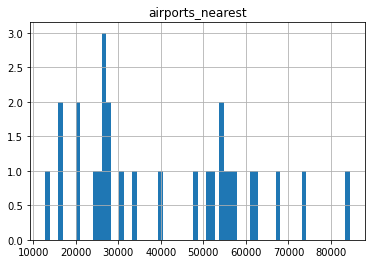

In [24]:
#сводная по поселкам и расстоянию
airports_nearest_inormal = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc='mean')

airports_nearest_inormal.hist(bins=70)
print(airports_nearest_inormal.head(10))
print(data.query('25000 < airports_nearest < 28000').count())

Странно, от Петергофа до Пулково-43 км, от Зеленогорска 82 км, от Колпино 26, от Парголово 53 км. А тут данные в тысячах. Кажется, данные указаны в метрах. c CityCenters_nearest то же самое. Пока значения пусть останутся такими, далее для анализа будут созданы отдельные столбцы с преобразованными данными

In [25]:
#поделим все значения, кроме Nan на 1000м
def airports_nearest(x):
    if x > 0:
        return x / 1000
    else: 
        return x    
data['airports_nearest'] = data['airports_nearest'].apply(airports_nearest)

#проверка
data['airports_nearest'].describe()

#сделаем то же самое для CityCenters_nearest
def citycenter_nearest(x):
    if x > 0:
        return x / 1000
    else: 
        return x   

data['cityCenters_nearest'] = data['cityCenters_nearest'].apply(citycenter_nearest)

#проверка
data['cityCenters_nearest'].describe()

count    18180.000000
mean        14.191278
std          8.608386
min          0.181000
25%          9.238000
50%         13.098500
75%         16.293000
max         65.968000
Name: cityCenters_nearest, dtype: float64

Расстояние до аэропорта и города теперь в км, расстояние до парков и водоемов в в метрах
Nan в столбцах с расстоянием и эатажами останутся, при анализе отбросим эти значения
Переходим к созданию новых колонок для анализа.

2.4.5 Анализ столбца стоимости квартиры last_price. Из-за большого числа нулей не удобно считать данные. Посмотрим какие цифры тут:

In [26]:
print(data['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64


Переведем из числа из 1 350 000 в 1.35 млн, чтобы было удобнее работать с данными, оценим разброс и значения:

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

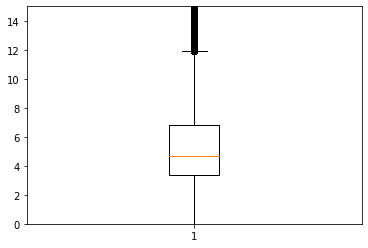

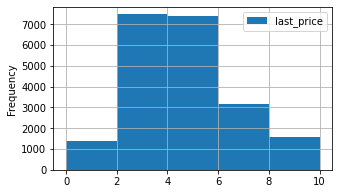

In [27]:
#сократим числа, убрав нули
def price(x):
    if x > 0:
        return x / 1000000
    else: 
        return x    
data['last_price'] = data['last_price'].apply(price)

round(data['last_price'],3)

#составим диаграмму размаха значений
plt.boxplot(data['last_price'])
plt.ylim(0,15)

#составим гистограмму
data.plot(y = 'last_price', kind = 'hist', bins = 5, grid=True, figsize = (5,3), range = (0,10))

#оценка значений
data['last_price'].describe()


Средняя стоимость жилья 6.54 млн, минимальная 121 тыс., максимальная 763 млн. Квартильный размах от 0 до 12 млн. Возьмем эта данные для анализа и отсечем выбивающиеся значения.

In [28]:
#отсечем выбивающиеся значения
good_data = data.query('last_price <= 12')

#проверим объем
good_data['last_price'].shape[0]/ data['last_price'].shape[0]

#проверим распределение значений
#good_data.plot(y = 'last_price', kind = 'hist', bins = 5, grid=True, figsize = (5,3), range = (0,10))

0.9180978100341787

Убрано около 9% данных. 

2.4.6 Рассмотрим данные в столбце rooms 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

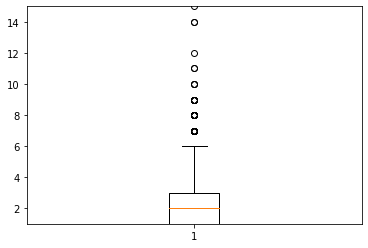

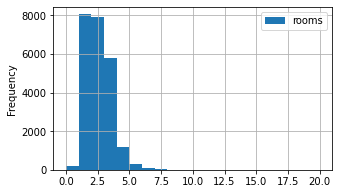

In [29]:
plt.boxplot(data['rooms'])
plt.ylim(1,15)

#составим гистограмму
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,20))

data['rooms'].describe()

Максимальное число комнат 19, возможно это коммунальные квартиры дают такой показать, минимальное - 0, возможно это студии. В среднем число комнат = 2. Квартильный размах от 0 до 6. Отсечем все лишние значения.

In [30]:
#отсечем выбивающиеся значения
good_data = data.query('rooms <= 6')

#проверим объем
good_data['rooms'].shape[0]/ data['rooms'].shape[0]

0.9962023714080763

Удалено менее 1% данных

### Посчитайте и добавьте в таблицу новые столбцы

3. Добавим в таблицу новые столбцы со следующими параметрами:

-цена одного квадратного метра;
-день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
-месяц публикации объявления;
-год публикации объявления;
-тип этажа квартиры (значения — «первый», «последний», «другой»);
-расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [31]:
#посчитаем цену квадратного метра
good_data['price_per_square_meter'] = data['last_price'] / data['total_area']

#округлим значения
good_data['price_per_square_meter'] = good_data['price_per_square_meter'].round(decimals=2)

#создадим столбец дня недели публикации
good_data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
good_data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
good_data['year_exposition'] = data['first_day_exposition'].dt.year

#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
good_data['floor_category'] = good_data.apply(floor_category, axis = 1)

#добавим столбец соотношения жилой плозади к общей
good_data['living_area_ratio'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
good_data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

#добавим столбец расстояния в км, округленный
good_data['cityCenters_km'] = data['cityCenters_nearest'].round(decimals=1)

#проверка
display(good_data)

/tmp/ipykernel_303/1851157227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['price_per_square_meter'] = data['last_price'] / data['total_area']
/tmp/ipykernel_303/1851157227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['price_per_square_meter'] = good_data['price_per_square_meter'].round(decimals=2)
/tmp/ipykernel_303/1851157227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_km
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,57,0.12,3,3,2019,другой,0.472222,0.231481,16.0
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81,0.08,1,12,2018,первый,0.460396,0.272277,18.6
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,0.09,3,8,2015,другой,0.612500,0.148214,13.9
3,0,64.900,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,234.0,424,0.41,4,7,2015,другой,NaN,0.057233,6.8
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,0.10,1,6,2018,другой,0.320000,0.410000,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,2.70,5,73.3,3,False,...,381.0,773,0.07,1,3,2017,другой,0.547792,0.103356,4.2
23695,14,3.100,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,45,0.05,0,1,2018,другой,0.644068,0.144068,NaN
23696,18,2.500,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,446,0.04,6,2,2018,первый,0.523810,0.160494,NaN
23697,13,11.475,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,196.0,602,0.15,1,3,2017,другой,NaN,0.303583,10.4


### Проведите исследовательский анализ данных

4.1 Изучим следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Построим отдельные гистограммы для каждого из этих параметров.

count    23699.000000
mean         2.683201
std          0.175420
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

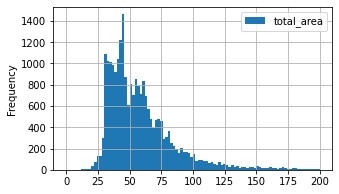

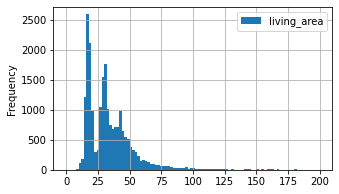

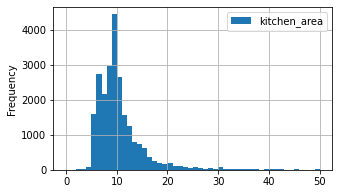

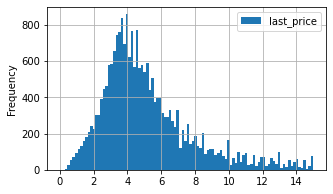

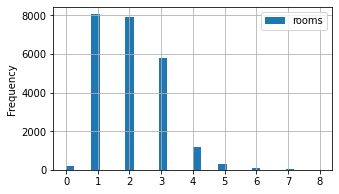

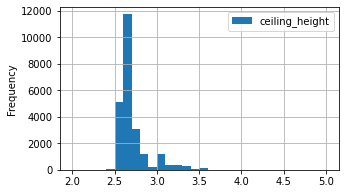

In [32]:
#изучим общую площадь
data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))
data['total_area'].describe()

#изучим жилую площадь
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))
data['living_area'].describe()

#изучим площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,50))
data['kitchen_area'].describe()

#изучим цену
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15), figsize = (5,3))
data['last_price'].describe()

#изучим число комнат
data['rooms']=data['rooms'].astype(int)
data
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, range =(0,8), figsize = (5,3))
data['rooms'].describe()

#изучим высоту потолков
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Вывод:
Общая площадь в выборке от 12 до 900 м.кв. Самые распространненные объекты с площзадью в 45 м.кв. Объектов от 30-45 кв.м. в 1,5 раза больше, чем кавартир с бОльшей площадью.
Жилая площадь от 10 до 100 м.кв., в среднем либо около 17, либо около 30 м.кв.
Площадь кухни от 3 до 50 м.кв, в среднем около 9-10 м.кв. 
Цены на недвижимость варьируются от 0 до 17 млн. Стоимость в среднем от 3 до 6 млн.руб. Распределение данных Гаусса.
Число комнат от 0 до 7. Самое распространеное жилье с 1-2 комнатами
Высота потолков от 1.8 до 3.8 м. В среднем от 2.5-2.7 м. 

другой       17357
последний     3313
первый        2907
Name: floor_category, dtype: int64


<AxesSubplot:ylabel='Frequency'>

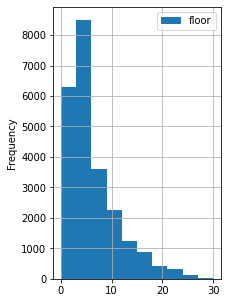

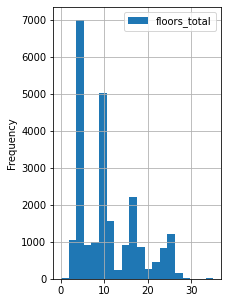

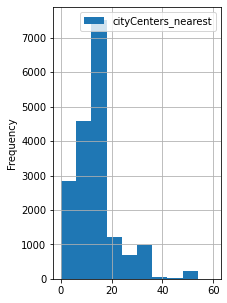

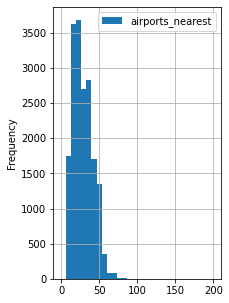

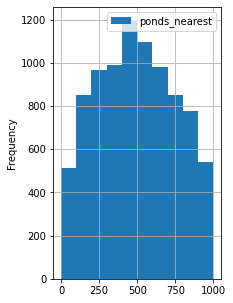

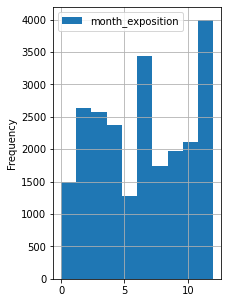

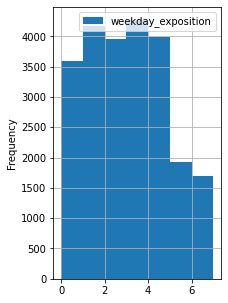

In [33]:
#изучим этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 10, range = (0,30), grid=True, figsize = (3,5))
data['floor'].describe()

#тип этажа квартиры («первый», «последний», «другой»)
floor_category = good_data['floor_category'].value_counts()
print(floor_category)

#общее количество этажей в доме
data.plot(y = 'floors_total', kind = 'hist', bins = 20, range = (0,35), grid=True, figsize = (3,5))

#расстояние до центра города в метрах
data['cityCenters_nearest'].describe()
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 10, range = (0,60), grid=True, figsize = (3,5))

#расстояние до ближайшего аэропорта
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, range = (0,200), grid=True, figsize = (3,5))

#расстояние до ближайшего парка
data.plot(y = 'ponds_nearest', kind = 'hist', bins = 10, range = (0,1000), grid=True, figsize = (3,5))

#месяц публикации объявления
good_data.plot(y = 'month_exposition', kind = 'hist', bins = 10, range = (0,12), grid=True, figsize = (3,5))

#день публикации
good_data.plot(y = 'weekday_exposition', kind = 'hist', bins = 7, range = (0,7), grid=True, figsize = (3,5))

Вывод: Только 12% недвижимости расположено на 1м или последнем этаже.  
Больше 50% из них расположены в домах до 10 этажа, чаще всего недвижимость находится в 0-9 этаже
Наиболее распространенные дома с 5 или 10 эатажами
Расположение от центра варьируется от 0 до 50 км, большинство объектов находится на расстоянии 10-17 км от центра, чуть реже от 0-10, и совсем редко больше 20 км
Распложение от аэропорта от 20-25 км, реже всего размещены объекты с отдаленностью больше 50 км
Водоемы возле объектов недвижимости есть практически везде, в среднем они удалены на 250-750 м
Пик сезона публикаций объявлений приходится на ноябрь-декабрь, чуть меньше всплеск в июле, спад сезона в мае и январе (февраль, март, апрель) чуть более популярен, чем (июль, август и сентябрь)
По дням публикаций объявлений в в топе вт-вт-ср-чт, чуть меньше понедельник. Самыми непопулярными днями публикаций объявлений-пятница, суббота и воскресение.

4.2 Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

count    23679.000000
mean       185.978673
std        233.416900
min          1.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

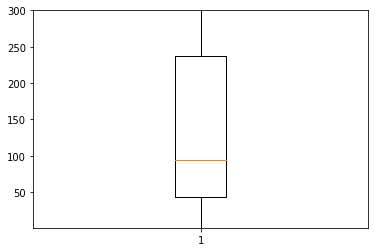

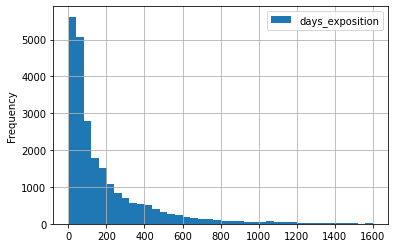

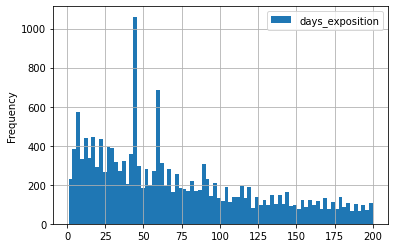

In [34]:
#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,300)

data.plot(y = 'days_exposition', kind = 'hist', bins = 40, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 80, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()

Cудя по гистограмме - мы имеем распределение Пуассона. Средний период публикации - 185 дней, а медиана - 233 дня. В большинстве случаев обьявление висит от 43 до 237 дней. Сделав гистограмму, обнаружено, что выбивающиеся значения и аномалии на 45, чуть меньше на 60, 7 и 30 день - это наиболее популярное количество дней до снятия объявления из-за особенности функционирования системы размещения яндекса.

В среднем объект недвижимости продается за 200 дней, бОльшинство объявлений висит не дольше 112 дней.

4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

0.6536750579657243

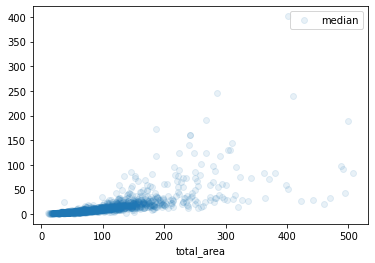

In [35]:
#изучим зависимость от общей площади

pivot_table_total_area = good_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.1) 

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Корреляция 0.65, влияние площади на стоимость есть. Чем больше общая площадь-тем выше стоимость жилья.

Зависимость цены от жилой площади

0.5664915336952651

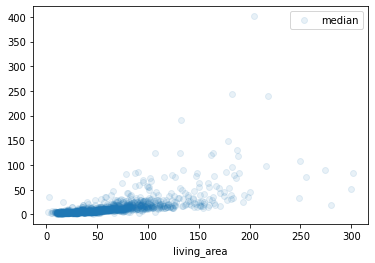

In [36]:
pivot_table_total_area = good_data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.1) 

pivot_table_total_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

Корреляция 0.56, то есть стоимость м.кв. зависит от жилой площади, чуть меньше, чем от общей площади жилья.

Рассмотрим зависимость от площади кухни:

0.4403156124344652

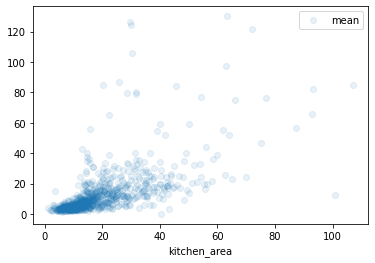

In [37]:
pivot_table_total_area = good_data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'mean', style = 'o', alpha = 0.1) 

pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Коэфициент корреляции 0,4. То есть стоимость в меньшей степени зависит от площади кухни.

Рассмотрим зависимость от количества комнат:

0.3633428499648948

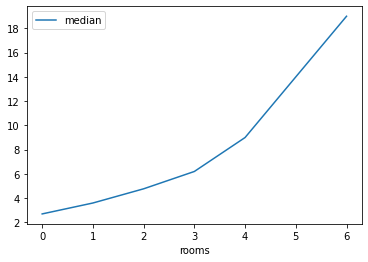

In [38]:
pivot_table_rooms = good_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Коэфициент корреляции 0,4 не сильно большая зависимость, но она есть. Чем выше число комнат-тем выше стоимость.

Рассмотрим зависимость от этажа, на котором расположена квартира (первый, последний, другой):

,mean,count,median
floor_category,,,
другой,6.580795,17357,4.8
первый,4.696334,2907,3.9
последний,6.731262,3313,4.3


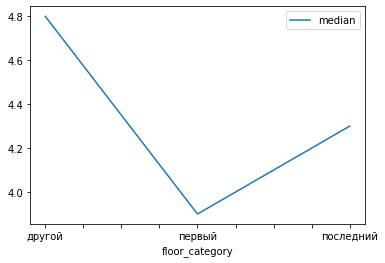

In [39]:
pivot_table_floor_category = good_data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Стоимость жилья зависит от этажа, первый этаж ценится меньше всего, медианная стоимость такого жилья 3.8 млн, последний этаж цениться чуть больше на 4,05. Другие этажи выше в цене (медианная в 4,6 млн)

Прямопропорциональная зависимость от высоты этажа, последний этаж ценится в 4 тысячи дороже за 1 м.кв, чем первый.

Изучим зависимость от года размещения, проследим динамику цены

,mean,count,median
year_exposition,,,
2014,12.087136,137,7.7000
2015,8.378621,1186,5.3125
2019,6.564578,2864,5.0300
2018,5.897862,8501,4.5500
2016,6.773295,2774,4.5000
2017,6.268115,8147,4.5000


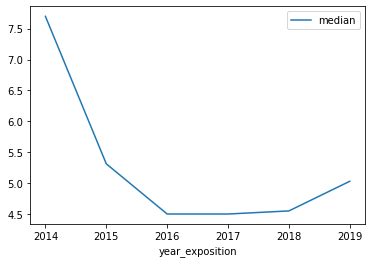

In [40]:
pivot_table_year_exposition = good_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Пик стоимости жилья был в 2014 - 7.7 млн, а потом стоимость резко начала падать.В 2015 достигла 5.3 млн. А в 2016-2017 стоимость достигла самых низких значений 4.5 млн. Но начиная с 2018 она начала расти в цене, за 2018 г. медианная стоимость от 4.5 млн выросла примерно до 5.0 млн.

Проверим сезонный спрос, оценим зависимость цены от месяца:

,mean,count,median
month_exposition,,,
4,6.620724,2369,4.8000
11,6.356139,2362,4.6995
9,6.343418,1974,4.6900
12,6.527271,1634,4.6900
2,6.408225,2631,4.6500
3,6.178997,2575,4.6500
1,6.516277,1496,4.6000
7,6.512754,1684,4.6000
8,6.313603,1739,4.5500


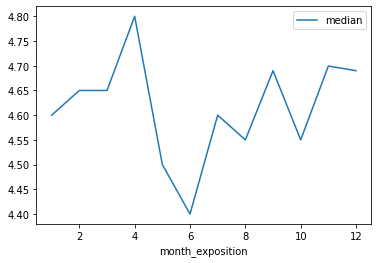

In [41]:
pivot_table_month_exposition = good_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Пик роста цен приходится на 3 месяца-апрель, ноябрь и сентябрь. А пик публикаций объявлений о продаже с марта по апрель, с августа-сентябрь, с октября по декабрь. Самый глубокий спад предложения (размещенных объявлений) с апреля по июнь.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [42]:
locality_pivot_table = good_data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table.sort_values(by='mean', ascending=False))

                 count      mean
locality_name                   
Санкт-Петербург  15634  7.816069
Пушкин             368  6.372484
Парголово          326  4.477609
Кудрово            472  4.358688
Шушары             440  4.108082
Колпино            337  3.866289
Всеволожск         398  3.789068
Мурино             590  3.678462
Гатчина            307  3.488337
Выборг             237  3.250983


Если оценивать средние значения стоимости, то самая высокая цена в СПб - 7.8 млн, на 2м месте по стоимости недвижимость в Пушкине - 6.3, на 350 000 дешевле, чем в СПб. Дальше на 3-4-5 месте соответсвенно конгломераты новостроек: Парголово, Кудрово и Шушары, стоимость от 4,48 до 4,10 млн. На последнем месте- Выборг, где жилой фонд не такой новый и большая удаленность от СПб  - 3,2 млн. Мурино не смотря на схожие типы районов с Кудрово занимает 8 позицию, жилье стоит в среднем на 600 тысяч дешевле, чем в Кудрово. 

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

                     mean
               last_price
cityCenters_km           
29.5                2.450
29.3                4.525
28.8                4.370
28.6                4.775
28.1                7.600
                     mean
               last_price
cityCenters_km           
0.2             15.963000
0.3             35.630648
0.4             39.177778
0.5             12.320000
0.6             39.934687


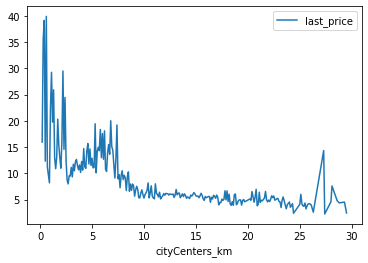

In [43]:
center_pivot_table = good_data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_km', values = 'last_price', aggfunc=['mean'])
center_pivot_table.plot(y='mean')
print(center_pivot_table.sort_values(by = 'cityCenters_km', ascending=False).head())
print(center_pivot_table.sort_values(by = 'cityCenters_km', ascending=True).head())

Чем ближе жилье к центру-тем выше стоимость. Самое дорогое жилье в диапазоне от 8 до 39 млн в радиусе от 0 до 3 км от центра. Самый дорогой радиус квартир лежит в пределах от 0-8 км. Интересно, что цена сновы растет в удаленности от 26 до 27 км.

### Общий вывод

Пройден тернистый путь исследования данных.

Были обработаны пропуски в данных, дубликаты и неявные дубликаты, групироввка данных по датам, месяцам, годам, изменен тип данных для удобства просчета.Найдены и устранены выбивающиеся и аномальные значения в высоте потолков, расстоянии до центра города и аэропорта.
На основе очищенных данных были просчитаны и добавлены новые столбцы со значениями цены одного квадратного метра; дня недели, месяца и года публикации, определены типы этажа квартиры (значения — «первый», «последний», «другой»);расстояние до центра города в километрах.

Изучено, как быстро продавались квартиры. Какие факторы влияют на общую(полную) стоимость объекта. На сколько и как зависит ли цена от:
общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).

На основе данных были пострены графики зависимости цены от указанных выше параметров. Посчитаны средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра. Проанализирована зависимость стоимости жилья в СПб от удаленности от цента города. 

На основе этой работы можно сделать следующие выводы о том, что влияет на стоимость метра квадратного:

1. Топ 10 населенных пунктов с самой высоко стоимостью жилья:
Санкт-Петербург  15634  7.816069
Пушкин             368  6.372484
Парголово          326  4.477609
Кудрово            472  4.358688
Шушары             440  4.108082
Колпино            337  3.866289
Всеволожск         398  3.789068
Мурино             590  3.678462
Гатчина            307  3.488337
Выборг             237  3.250983

2. Чем ближе к центру, тем дороже жилье в Санкт-Петербурге.  
Расположение в СПб влияет на цены.Так жилье в центре на 40% дороже недвижимости удаленной от него больше чем на 20 км. Самое дорогое жилье в диапазоне от 8 до 39 млн в радиусе от 0 до 3 км от центра. В среднем квартиры в пределах от 0-8 км от центра дороже выборки.

3. Больше всего на стоимость влияет общая площадь
Влияние площади на стоимость есть. Чем больше общая площадь-тем выше стоимость жилья. Еще меньше стоимость зависит от жилой площади, и очень слабая зависимость стоимости от площади кухни.

4. Этаж, число комнат
Чем выше число комнат-тем больше стоимость. Стоимость жилья так же зависит от этажа, первый этаж ценится меньше всего, медианная стоимость такого жилья 3.8 млн, последний этаж цениться чуть больше на 4,05. Другие этажи выше в цене (медианная в 4,6 млн)

5. Сезонность и спрос
По годам: рынок недвижимости пережил глубокий спад, в 2018 после 4 лет падения рынок начал восстанавливаться. Пик стоимости жилья был в 2014 - 7.7 млн, а потом стоимость резко начала падать.В 2015 достигла 5.3 млн. А в 2016-2017 стоимость достигла самых низких значений 4.5 млн. Но начиная с 2018 она начала расти в цене, за 2018 г. медианная стоимость от 4.5 млн выросла примерно до 5.0 млн.

По месяцам: пик роста цен приходится на 3 месяца-апрель, ноябрь и сентябрь. А пик публикаций объявлений о продаже с марта по апрель, с августа-сентябрь, с октября по декабрь. Самый глубокий спад предложения (размещенных объявлений) с апреля по июнь. То есть, чтобы выгодно продать, из всего года лучше публиковать объявления в конце августа-начале сентября.

6. Период продажи
Средний период публикации - 185 дней, а медиана - 233 дня. В большинстве случаев обьявление висит от 43 до 237 дней. 